In [1]:
from sklearn import datasets
import seaborn as sns

In [2]:
iris = sns.load_dataset("iris")

In [3]:
type(iris)

pandas.core.frame.DataFrame

In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
iris.shape

(150, 5)

In [7]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
iris.species.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

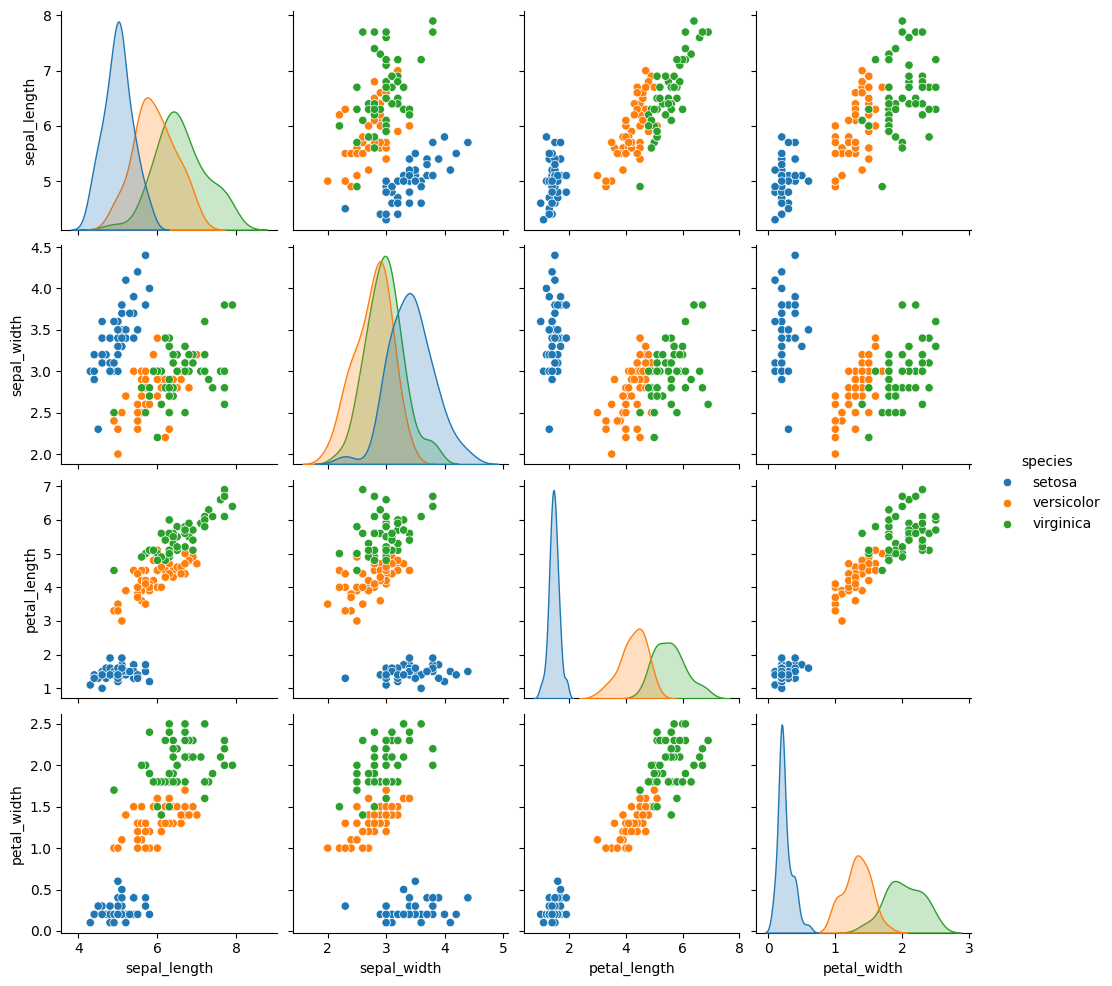

In [9]:
sns.pairplot(data = iris, hue = "species")

In [10]:
iris_simple = iris.drop(["sepal_length", "sepal_width"], axis = 1)
iris_simple.head()

,petal_length,petal_width,species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa


In [11]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
iris_simple["species"] = encoder.fit_transform(iris_simple["species"])

In [12]:
iris_simple

,petal_length,petal_width,species
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


In [13]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [14]:
trans = StandardScaler()
_iris_simple = trans.fit_transform(iris_simple[["petal_length", "petal_width"]])
_iris_simple = pd.DataFrame(_iris_simple, columns = ["petal_length", "petal_width"])
_iris_simple.describe()

,petal_length,petal_width
count,1.500000e+02,1.500000e+02
mean,-4.263256e-16,-4.736952e-16
std,1.003350e+00,1.003350e+00
min,-1.567576e+00,-1.447076e+00
25%,-1.226552e+00,-1.183812e+00
50%,3.364776e-01,1.325097e-01
75%,7.627583e-01,7.906707e-01
max,1.785832e+00,1.712096e+00


In [19]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(iris_simple, test_size = 0.2)
test_set.head()

,petal_length,petal_width,species
18,1.7,0.3,0
104,5.8,2.2,2
143,5.9,2.3,2
125,6.0,1.8,2
79,3.5,1.0,1


In [20]:
iris_x_train = train_set[["petal_length", "petal_width"]]
iris_x_train.head()

,petal_length,petal_width
89,4.0,1.3
55,4.5,1.3
146,5.0,1.9
42,1.3,0.2
138,4.8,1.8


In [21]:
iris_y_train = train_set["species"].copy()
iris_y_train.head()

89     1
55     1
146    2
42     0
138    2
Name: species, dtype: int32

In [22]:
iris_x_test = test_set[["petal_length", "petal_width"]]
iris_x_test.head()

,petal_length,petal_width
18,1.7,0.3
104,5.8,2.2
143,5.9,2.3
125,6.0,1.8
79,3.5,1.0


In [23]:
iris_y_test = test_set["species"].copy()
iris_y_test.head()

18     0
104    2
143    2
125    2
79     1
Name: species, dtype: int32

# k近邻算法

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
clf = KNeighborsClassifier()
clf

KNeighborsClassifier()

In [27]:
clf.fit(iris_x_train, iris_y_train)

KNeighborsClassifier()

In [28]:
res = clf.predict(iris_x_test)
print(res)
print(iris_y_test.values)

[0 2 2 2 1 1 0 0 2 1 1 1 0 2 2 0 0 2 0 1 0 1 1 2 2 1 0 2 2 1]
[0 2 2 2 1 1 0 0 2 1 1 1 0 2 2 0 0 2 0 1 0 1 1 2 2 1 0 2 2 1]


In [29]:
encoder.inverse_transform(res)

array(['setosa', 'virginica', 'virginica', 'virginica', 'versicolor',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'versicolor', 'setosa', 'virginica', 'virginica',
       'setosa', 'setosa', 'virginica', 'setosa', 'versicolor', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'virginica', 'versicolor',
       'setosa', 'virginica', 'virginica', 'versicolor'], dtype=object)

In [30]:
accuracy = clf.score(iris_x_test, iris_y_test)
print("预测正确率:{:.0%}".format(accuracy))

预测正确率:100%


In [31]:
out = iris_x_test.copy()
out["yy"] = iris_y_test
out["pre"] = res
out

,petal_length,petal_width,yy,pre
18,1.7,0.3,0,0
104,5.8,2.2,2,2
143,5.9,2.3,2,2
125,6.0,1.8,2,2
79,3.5,1.0,1,1
65,4.4,1.4,1,1
33,1.4,0.2,0,0
39,1.5,0.2,0,0
124,5.7,2.1,2,2
91,4.6,1.4,1,1


In [32]:
out.to_csv("iris_predict.csv")

In [33]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [41]:
def draw(clf):
    M, N = 500, 500
    x1_min, x2_min = iris_simple[["petal_length", "petal_width"]].min(axis=0)
    x1_max, x2_max = iris_simple[["petal_length", "petal_width"]].max(axis=0)
    t1 = np.linspace(x1_min, x1_max, M)
    t2 = np.linspace(x2_min, x2_max, N)
    x1, x2 = np.meshgrid(t1, t2)

    x_show = np.stack((x1.flat, x2.flat), axis = 1)
    y_predict = clf.predict(x_show)

    cm_light = mpl.colors.ListedColormap(['#0000FF', '#FFFF00', '#00FF00'])
    cm_dark = mpl.colors.ListedColormap(["g", "r", "b"])

    plt.figure(figsize = (10,6))
    plt.pcolormesh(t1, t2, y_predict.reshape(x1.shape), cmap = cm_light)

    plt.scatter(iris_simple["petal_length"], iris_simple["petal_width"], label = None,
                c = iris_simple["species"], cmap = cm_dark, marker = 'o', edgecolors = 'k')
    plt.xlabel("petal_length")
    plt.ylabel("petal_width")

    color = ["g", "r", "b"]
    species = ["setosa", "virginica", "versicolor"]
    for i in range(3):
        plt.scatter([], [], c = color[i], s = 40, label = species[i])
    plt.legend(loc = "best")
    plt.title('iris_classfier')

C:\Users\卫小胖哦\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


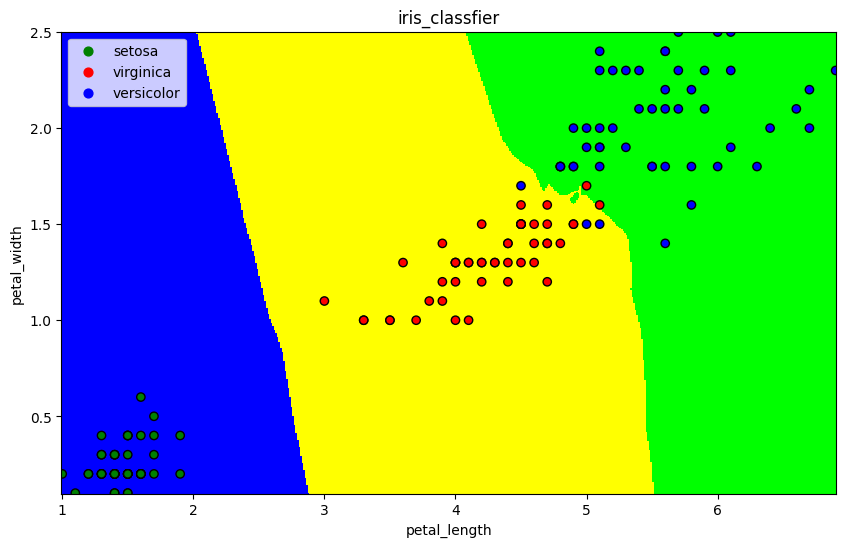

In [42]:
draw(clf)

# 朴素贝叶斯算法

In [45]:
from sklearn.naive_bayes import GaussianNB

In [47]:
clf = GaussianNB()
clf

GaussianNB()

In [48]:
clf.fit(iris_x_train, iris_y_train)

GaussianNB()

In [49]:
res = clf.predict(iris_x_test)
print(res)
print(iris_y_test.values)

[0 2 2 2 1 1 0 0 2 1 1 1 0 2 2 0 0 2 0 1 0 1 1 2 2 1 0 2 2 1]
[0 2 2 2 1 1 0 0 2 1 1 1 0 2 2 0 0 2 0 1 0 1 1 2 2 1 0 2 2 1]


In [50]:
accuracy = clf.score(iris_x_test, iris_y_test)
print("预测正确率:{:.0%}".format(accuracy))

预测正确率:100%


C:\Users\卫小胖哦\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


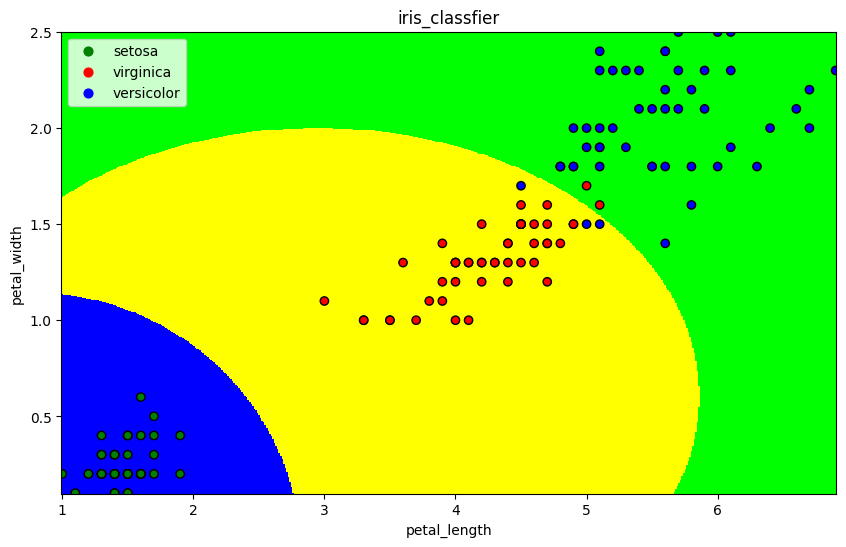

In [51]:
draw(clf)

# 决策数算法

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
clf = DecisionTreeClassifier()
clf

DecisionTreeClassifier()

In [59]:
clf.fit(iris_x_train, iris_y_train)

DecisionTreeClassifier()

In [60]:
res = clf.predict(iris_x_test)
print(res)
print(iris_y_test.values)

[0 2 2 2 1 1 0 0 2 1 1 1 0 2 2 0 0 2 0 1 0 1 1 2 2 1 0 2 2 1]
[0 2 2 2 1 1 0 0 2 1 1 1 0 2 2 0 0 2 0 1 0 1 1 2 2 1 0 2 2 1]


In [61]:
accuracy = clf.score(iris_x_test, iris_y_test)
print("预测正确率:{:.0%}".format(accuracy))

预测正确率:100%


C:\Users\卫小胖哦\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


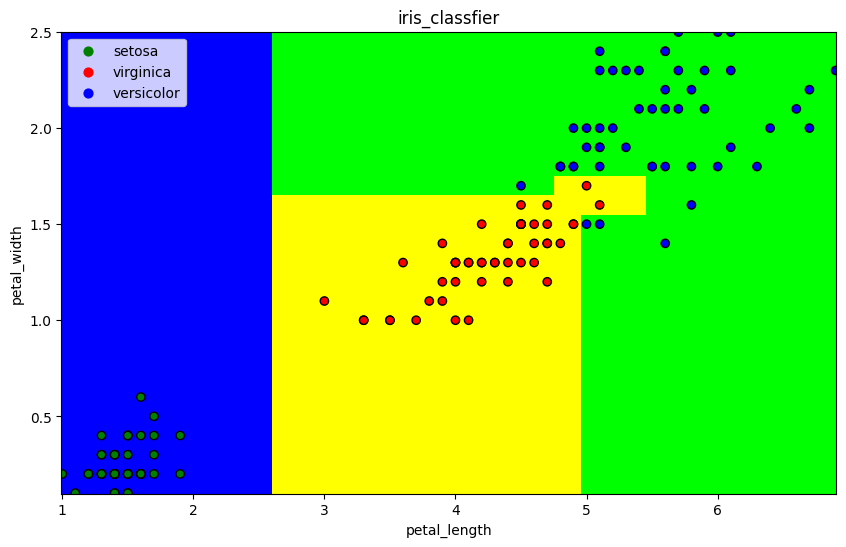

In [62]:
draw(clf)

# 逻辑回归算法

In [63]:
from sklearn.linear_model import LogisticRegression

In [66]:
clf = LogisticRegression(solver='saga', max_iter = 1000)
clf

LogisticRegression(max_iter=1000, solver='saga')

In [67]:
clf.fit(iris_x_train, iris_y_train)

LogisticRegression(max_iter=1000, solver='saga')

In [68]:
res = clf.predict(iris_x_test)
print(res)
print(iris_y_test.values)

[0 2 2 2 1 1 0 0 2 1 1 1 0 2 2 0 0 2 0 1 0 1 1 2 2 1 0 2 2 1]
[0 2 2 2 1 1 0 0 2 1 1 1 0 2 2 0 0 2 0 1 0 1 1 2 2 1 0 2 2 1]


In [70]:
accuracy = clf.score(iris_x_test, iris_y_test)
print("预测正确率:{:.0%}".format(accuracy))

预测正确率:100%


C:\Users\卫小胖哦\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


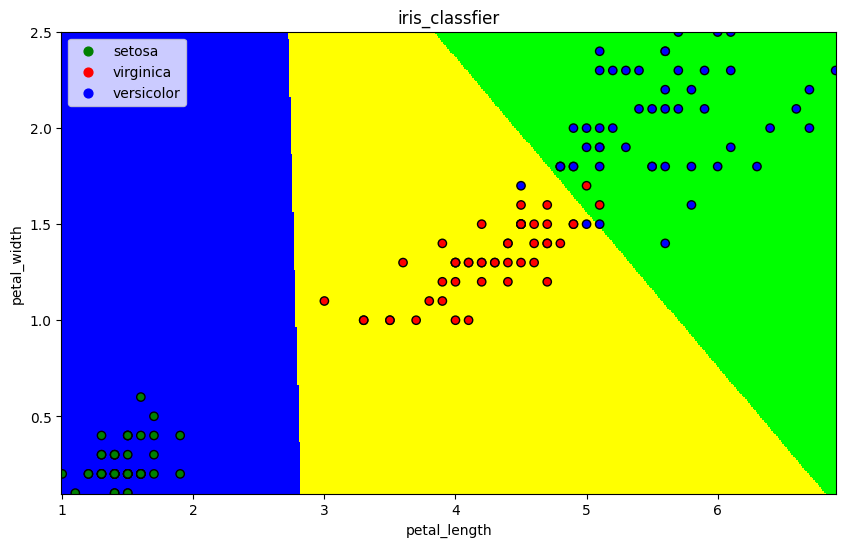

In [71]:
draw(clf)

# 支持向量机算法

In [72]:
from sklearn.svm import SVC

In [74]:
clf = SVC()
clf

SVC()

In [75]:
clf.fit(iris_x_train, iris_y_train)

SVC()

In [76]:
res = clf.predict(iris_x_test)
print(res)
print(iris_y_test.values)

[0 2 2 2 1 1 0 0 2 1 1 1 0 2 2 0 0 2 0 1 0 1 1 2 2 1 0 2 2 1]
[0 2 2 2 1 1 0 0 2 1 1 1 0 2 2 0 0 2 0 1 0 1 1 2 2 1 0 2 2 1]


In [78]:
accuracy = clf.score(iris_x_test, iris_y_test)
print("预测正确率:{:.0%}".format(accuracy))

预测正确率:100%


C:\Users\卫小胖哦\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


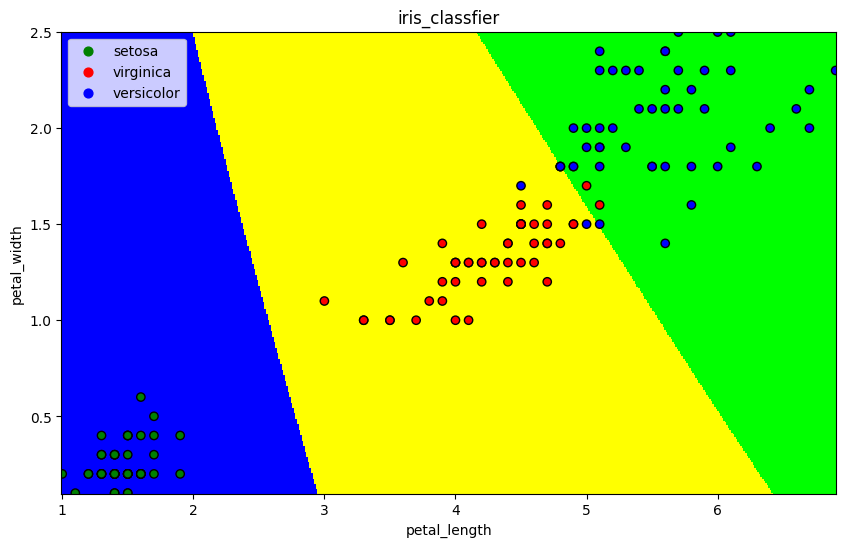

In [79]:
draw(clf)

# 集成方法__随机森林

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
clf = RandomForestClassifier()
clf

RandomForestClassifier()

In [82]:
clf.fit(iris_x_train, iris_y_train)

RandomForestClassifier()

In [83]:
res = clf.predict(iris_x_test)
print(res)
print(iris_y_test.values)

[0 2 2 2 1 1 0 0 2 1 1 1 0 2 2 0 0 2 0 1 0 1 1 2 2 1 0 2 2 1]
[0 2 2 2 1 1 0 0 2 1 1 1 0 2 2 0 0 2 0 1 0 1 1 2 2 1 0 2 2 1]


In [84]:
accuracy = clf.score(iris_x_test, iris_y_test)
print("预测正确率:{:.0%}".format(accuracy))

预测正确率:100%


C:\Users\卫小胖哦\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


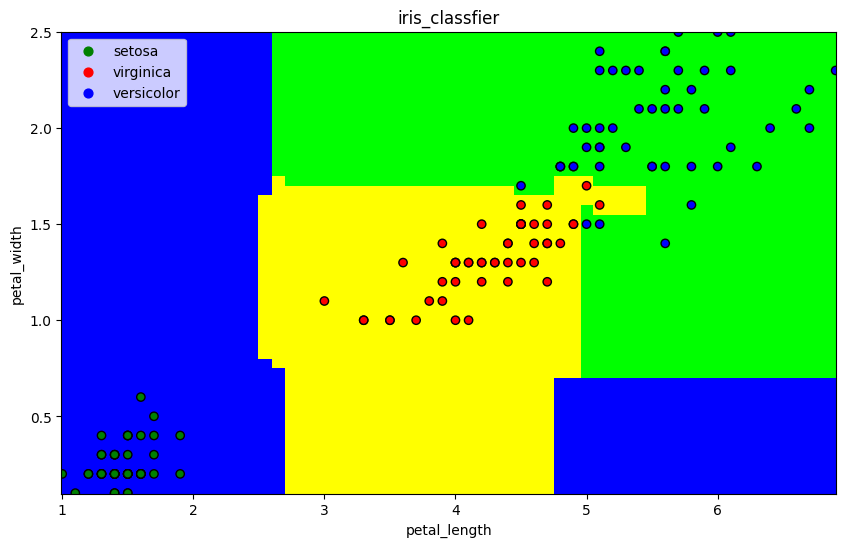

In [85]:
draw(clf)

# 集成方法--Adaboost

In [86]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

In [87]:
clf = AdaBoostClassifier()
clf

AdaBoostClassifier()

In [88]:
clf.fit(iris_x_train, iris_y_train)

C:\Users\卫小胖哦\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [89]:
res = clf.predict(iris_x_test)
print(res)
print(iris_y_test.values)

[0 2 2 2 1 1 0 0 2 1 1 1 0 2 2 0 0 2 0 1 0 1 1 2 2 1 0 2 2 1]
[0 2 2 2 1 1 0 0 2 1 1 1 0 2 2 0 0 2 0 1 0 1 1 2 2 1 0 2 2 1]


In [90]:
accuracy = clf.score(iris_x_test, iris_y_test)
print("预测正确率:{:.0%}".format(accuracy))

预测正确率:100%


C:\Users\卫小胖哦\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


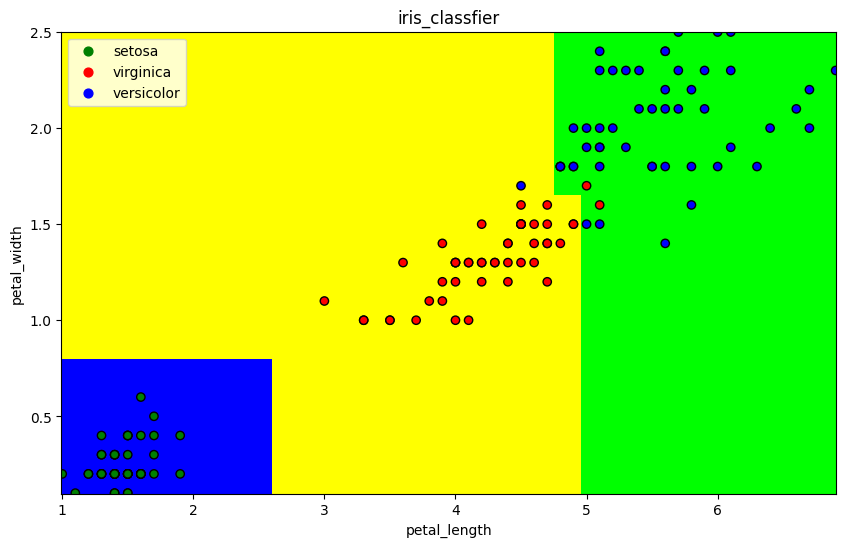

In [91]:
draw(clf)

# 集成方案--梯度提升树GBDT

In [93]:
from sklearn.ensemble import GradientBoostingClassifier

In [94]:
clf = GradientBoostingClassifier()
clf

GradientBoostingClassifier()

In [95]:
clf.fit(iris_x_train, iris_y_train)

GradientBoostingClassifier()

In [96]:
res = clf.predict(iris_x_test)
print(res)
print(iris_y_test.values)

[0 2 2 2 1 1 0 0 2 1 1 1 0 2 2 0 0 2 0 1 0 1 1 2 2 1 0 2 2 1]
[0 2 2 2 1 1 0 0 2 1 1 1 0 2 2 0 0 2 0 1 0 1 1 2 2 1 0 2 2 1]


In [97]:
accuracy = clf.score(iris_x_test, iris_y_test)
print("预测正确率:{:.0%}".format(accuracy))

预测正确率:100%


C:\Users\卫小胖哦\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


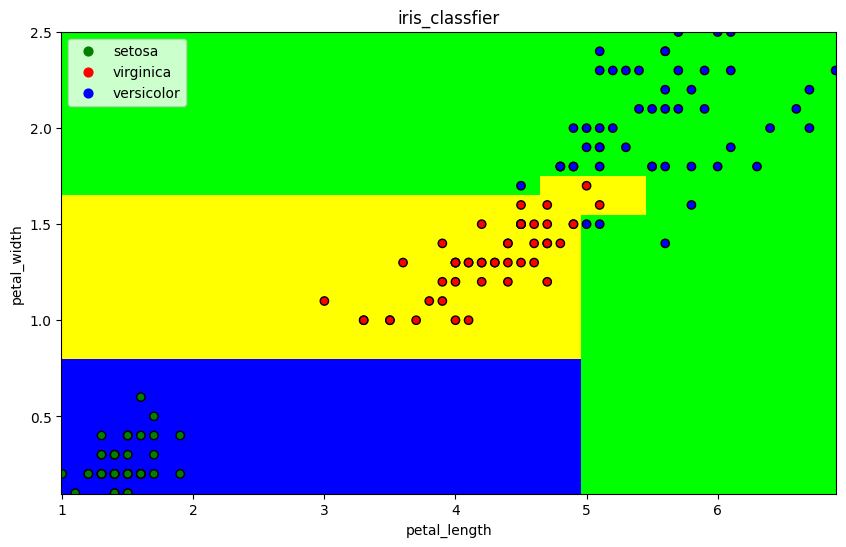

In [98]:
draw(clf)